# Assignment 2 - CSCI 5901 The Process of Data Science
##### A2_AbhinandanWalia_ManpreetSingh
##### Abhinandan Walia : B00820613
##### Manpreet Singh : B00821998

## Q1. Collocation Extraction

### Importing the packages

In [14]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')  
import numpy as np  
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.tokenize import RegexpTokenizer 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
import re
import heapq
from sklearn.feature_extraction import stop_words
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import svm
stopwords = stop_words.ENGLISH_STOP_WORDS
stemmer = SnowballStemmer('english')

[nltk_data] Downloading package punkt to C:\Users\Manpreet
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Manpreet Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to C:\Users\Manpreet
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Tokenize the Newsgroup Datasets

Reference: NLTK Official Documentation https://www.nltk.org/book/ch05.html

In [15]:
data_categories = ['alt.atheism', 'talk.religion.misc','comp.graphics', 'sci.space']
newsgroup_dataset = fetch_20newsgroups(subset='all', categories=data_categories, shuffle=True, random_state=42)

In [16]:
newsGroupText = newsgroup_dataset.data

In [17]:
tokenized_text = word_tokenize(str(newsGroupText))
#print(tokenized_text)

### Cleaning the data : Removing all non-alphabetic words/characters

In [18]:
tokenized_text = str(tokenized_text).replace('\\n','')
cleantext = re.sub('[^A-Za-z]+',' ',str(tokenized_text))

### Tokenize Clean Data
Reference: Tutorial 6

In [19]:
final_tokenized_text = word_tokenize(str(cleantext))
#print(final_tokenized_text)

### POS Tagging: 
Reference: Tutorial 6 and NLTK Official Documentation https://www.nltk.org/book/ch05.html

In [7]:
nltk.pos_tag(final_tokenized_text)

[('From', 'IN'),
 ('healta', 'JJ'),
 ('saturn', 'NN'),
 ('wwc', 'NN'),
 ('edu', 'NN'),
 ('Tammy', 'NNP'),
 ('R', 'NNP'),
 ('Healy', 'NNP'),
 ('Subject', 'NNP'),
 ('Re', 'NNP'),
 ('who', 'WP'),
 ('are', 'VBP'),
 ('we', 'PRP'),
 ('to', 'TO'),
 ('judge', 'VB'),
 ('Bobby', 'NNP'),
 ('Lines', 'NNPS'),
 ('Organization', 'NNP'),
 ('Walla', 'NNP'),
 ('Walla', 'NNP'),
 ('College', 'NNP'),
 ('Lines', 'NNP'),
 ('In', 'IN'),
 ('article', 'NN'),
 ('Apr', 'NNP'),
 ('ultb', 'JJ'),
 ('isc', 'NN'),
 ('rit', 'NN'),
 ('edu', 'NN'),
 ('snm', 'NN'),
 ('ultb', 'JJ'),
 ('isc', 'NN'),
 ('rit', 'NN'),
 ('edu', 'NN'),
 ('S', 'NNP'),
 ('N', 'NNP'),
 ('Mozumder', 'NNP'),
 ('writes', 'VBZ'),
 ('From', 'IN'),
 ('snm', 'NN'),
 ('ultb', 'JJ'),
 ('isc', 'NN'),
 ('rit', 'NN'),
 ('edu', 'NN'),
 ('S', 'NNP'),
 ('N', 'NNP'),
 ('Mozumder', 'NNP'),
 ('Subject', 'NNP'),
 ('Re', 'NNP'),
 ('who', 'WP'),
 ('are', 'VBP'),
 ('we', 'PRP'),
 ('to', 'TO'),
 ('judge', 'VB'),
 ('Bobby', 'NNP'),
 ('Date', 'NNP'),
 ('Wed', 'NNP'),
 ('Ap

### Frequency Distribution
Reference: Tutorial 6

In [41]:
frequencyDistribution = FreqDist(final_tokenized_text)
print(frequencyDistribution)

<FreqDist with 49054 samples and 1086761 outcomes>


In [10]:
frequencyDistribution.most_common(20)

[('the', 40792),
 ('of', 24721),
 ('to', 23735),
 ('a', 19221),
 ('and', 18505),
 ('is', 16078),
 ('I', 14296),
 ('that', 13484),
 ('in', 12499),
 ('t', 11318),
 ('it', 9299),
 ('you', 8885),
 ('for', 8518),
 ('be', 6725),
 ('edu', 6588),
 ('not', 6482),
 ('are', 6304),
 ('on', 6061),
 ('s', 5936),
 ('have', 5677)]

### Plot for Top 20 values

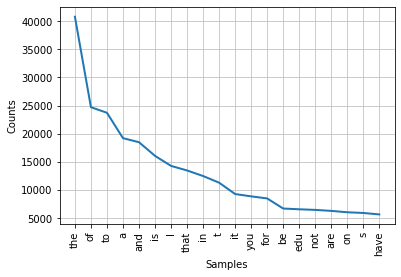

In [11]:
frequencyDistribution.plot(20,cumulative=False)
plt.show()

### Function to filter only Nouns and Adjectives
Reference: Tutorial 6

In [43]:
stopwords = stop_words.ENGLISH_STOP_WORDS
def validateData(data):
    if '-pron-' in data or 't' in data:
        return False
    for word in data:
        if word in stopwords or word.isspace():
            return False
    acceptable_types = ('JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS')
    second_type = ('NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(data)
    if tags[0][1] in acceptable_types and tags[1][1] in second_type:
        return True
    else:
        return False

### Frequency with filter: 
Performed on the clean data

Reference: Tutorial 6

In [44]:
bigrams = nltk.collocations.BigramAssocMeasures()
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(final_tokenized_text)
bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
print(bigramFreqTable)

                       bigram  freq
195                 (of, the)  5400
83                  (in, the)  3086
1954                   (t, t)  2734
8               (Subject, Re)  2433
22              (In, article)  1961
693                 (to, the)  1851
223                  (to, be)  1703
980                 (on, the)  1655
986                   (is, a)  1510
284           (Posting, Host)  1493
201                  (don, t)  1471
3213                 (it, is)  1292
383                (for, the)  1289
2679              (that, the)  1252
1021               (and, the)  1115
240                    (I, m)  1099
298                    (n, t)  1070
4707                (is, the)  1053
21                (Lines, In)  1030
1584                (I, have)   975
2882              (from, the)   935
1488                (is, not)   926
1368              (with, the)   906
1648                  (of, a)   905
283           (NNTP, Posting)   894
3652                  (it, s)   851
277          (University, of

### Bigram Frequency filter
Reference: Tutorial 6

In [45]:
bigram_Filtered = bigramFreqTable[bigramFreqTable.bigram.map(lambda data: validateData(data))]
bigram_Filtered.head(20)

,bigram,freq
8,"(Subject, Re)",2433
23,"(article, Apr)",574
2317,"(nasa, gov)",496
1973,"(Organization, University)",495
3127,"(Lines, NNTP)",471
419,"(Distribution, world)",368
1960,"(uiuc, edu)",339
3674,"(caltech, edu)",336
3339,"(article, C)",334
7129,"(ac, uk)",327


### PMI: 
Performed on the clean data

Reference: Tutorial 6

In [46]:
bigramFinder.apply_freq_filter(20)
bigramPMITable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.pmi)), columns=['bigram','PMI']).sort_values(by='PMI', ascending=False).head(20)
print(bigramPMITable)

                       bigram        PMI
0           (televison, Repo)  15.729675
2            (Evelyn, Conlon)  15.592172
3               (odwyer, sse)  15.592172
1                (Duck, Pond)  15.592172
4           (dean, kaflowitz)  15.407747
5               (Notre, Dame)  15.351164
6             (physik, unizh)  15.343617
7           (Cites, enclosed)  15.296716
8               (Tape, Cites)  15.296716
9                 (hela, ins)  15.296716
11           (organpipe, uug)  15.296716
10              (Eau, Claire)  15.296716
12          (Wales, Larrison)  15.229602
13                 (ntua, gr)  15.144713
14  (Southwestern, Louisiana)  15.126791
15             (maple, circa)  15.113004
16            (pyron, skndiv)  15.097407
17              (atlanta, dg)  15.051603
18             (comme, aucun)  15.051603
19         (GENERAL, UNIFIED)  15.045177


### T-test: 
Performed on the clean data

Reference: Tutorial 6

In [47]:
bigramTtable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.student_t)), columns=['bigram','t-Test']).sort_values(by='t-Test', ascending=False)
bigramTtable.head(20)

,bigram,t-Test
0,"(of, the)",60.857404
1,"(t, t)",50.033395
2,"(Subject, Re)",49.151586
3,"(in, the)",47.106416
4,"(In, article)",44.129091
5,"(Posting, Host)",38.584629
6,"(don, t)",37.953644
7,"(to, be)",37.708321
8,"(on, the)",35.089446
9,"(I, m)",32.617857


### Chi-SQ Test: 
Performed on the clean data

Reference: Tutorial 6

In [48]:
bigramChi_SqTable = pd.DataFrame(list(bigramFinder.score_ngrams(bigrams.chi_sq)), columns=['bigram','Chi_sq']).sort_values(by='Chi_sq', ascending=False).head(20)
print(bigramChi_SqTable)

                    bigram     Chi_sq
0           (solntze, wpd)  1086761.0
1           (ALink, KSAND)  1086761.0
19           (utarlg, uta)  1086761.0
18         (timmbake, mcl)  1086761.0
17       (televison, Repo)  1086761.0
16            (quack, kfu)  1086761.0
15           (odwyer, sse)  1086761.0
14             (mchp, sni)  1086761.0
13         (jaeger, buphy)  1086761.0
12          (comme, aucun)  1086761.0
11          (cnsvax, uwec)  1086761.0
10              (bmd, trw)  1086761.0
9            (atlanta, dg)  1086761.0
8   (arromdee, jyusenkyou)  1086761.0
7               (ap, mchp)  1086761.0
6       (VACATION, VENARI)  1086761.0
5            (Notre, Dame)  1086761.0
4         (Evelyn, Conlon)  1086761.0
3    (Cookamunga, Tourist)  1086761.0
2       (Carnegie, Mellon)  1086761.0


### Overlapping
Performed on the clean data

Reference: Tutorial 6

In [57]:
overlap = pd.DataFrame(columns=['Frequency','PMI','T-Test','Chi-Sq'])
overlap['Frequency'] = bigram_Filtered['bigram']
overlap['PMI'] = bigramPMITable['bigram']
overlap['T-Test'] = bigramTtable['bigram']
overlap['Chi-Sq'] = bigramChi_SqTable['bigram']
overlap.head(20)

,Frequency,PMI,T-Test,Chi-Sq
8,"(Subject, Re)","(Tape, Cites)","(on, the)","(arromdee, jyusenkyou)"
23,"(article, Apr)",NaN,"(from, the)",NaN
2317,"(nasa, gov)",NaN,"(is, really)",NaN
1973,"(Organization, University)",NaN,"(of, having)",NaN
3127,"(Lines, NNTP)",NaN,"(Physics, Department)",NaN
419,"(Distribution, world)",NaN,"(okcforum, osrhe)",NaN
1960,"(uiuc, edu)",NaN,"(back, and)",NaN
3674,"(caltech, edu)",NaN,"(NC, These)",NaN
3339,"(article, C)",NaN,"(Introduction, to)",NaN
7129,"(ac, uk)",NaN,NaN,NaN


Analysing the top 20 results, there is no overlap among the different tests.Thus, they provide different data. The union among the results will increase the result set. The collection of bigram will be a large data set. Filtering based on the union will make more sense.

## Q2. SVM and NB for Text Classification

### Sentence Tokenization, Stemming, Noun and Adjective filter
Performed on the clean data

Reference: Tutorial 6, Lab6

In [191]:
sentencesq2 = []
for textq2 in newsGroupText:
    lineq2 = sent_tokenize(textq2)
    sentencesq2.append(lineq2)

In [192]:
newSentencesq2 = []
for sentq2 in sentencesq2:
    for wq2 in sentq2:
        temporaryq2 = []
        if wq2 not in stopwords:
            temporaryq2.append(wq2)
    newSentencesq2.append(temporaryq2)

In [193]:
def Find_Nouns_Adj(dataq2):
    nounq2=[]
    acceptable_typesq2 = ('JJ', 'JJR', 'JJS','NN', 'NNS', 'NNP', 'NNPS')
    tokenq2 = word_tokenize(dataq2)
    tagsq2 = nltk.pos_tag(tokenq2)
    for wordq2 in tagsq2:
        if(wordq2[1] in acceptable_typesq2):
            nounq2.append(wordq2[0])
    return nounq2

In [194]:
newlistq2 = []
for sentq2 in newSentencesq2:
    temporaryq2 = []
    for wq2 in sentq2:
        Newcleantextq2 = re.sub('[^A-Za-z]+',' ',str(wq2))
        temporaryq2.append(Newcleantextq2)
        sent_stemmedq2 = stemmer.stem(str(temporaryq2))
    nounsq2 = Find_Nouns_Adj(sent_stemmedq2)
    newlistq2.append(nounsq2)
newlist_Finalq2 = [' '.join(x) for x in newlistq2]

### TF-IDF Weighted Vector Representation
Performed on the clean data

Reference: Tutorial 6

In [195]:
vectorizer = TfidfVectorizer()
tfIdfCalculationq2 = vectorizer.fit_transform(newlist_Finalq2)
print(tfIdfCalculationq2)

  (0, 5153)	1.0
  (1, 2923)	0.5330153553475698
  (1, 2805)	0.5833760732383618
  (1, 4294)	0.6128352047138721
  (2, 526)	0.09193819194038774
  (2, 1157)	0.08195080219411717
  (2, 4519)	0.07828332063063786
  (2, 4289)	0.08751870157305952
  (2, 3439)	0.09193819194038774
  (2, 1670)	0.053826943455181034
  (2, 3719)	0.07682785457045452
  (2, 5411)	0.09193819194038774
  (2, 4495)	0.07554404252076466
  (2, 924)	0.09193819194038774
  (2, 5047)	0.07072815194567125
  (2, 1644)	0.08751870157305952
  (2, 4369)	0.08751870157305952
  (2, 3236)	0.09193819194038774
  (2, 1391)	0.07439563350915057
  (2, 2773)	0.17503740314611904
  (2, 3258)	0.12634596652140928
  (2, 1114)	0.07439563350915057
  (2, 4148)	0.16876604651084226
  (2, 1091)	0.16876604651084226
  (2, 1137)	0.18387638388077548
  :	:
  (3381, 2624)	0.1713615898911927
  (3381, 4008)	0.23883687420260963
  (3381, 1844)	0.16788942474525287
  (3382, 5985)	0.2210562697762052
  (3382, 1235)	0.2210562697762052
  (3382, 5984)	0.2210562697762052
  (3382,

### Bag of Words
Reference: https://stackabuse.com/python-for-nlp-creating-bag-of-words-model-from-scratch/

In [196]:
wordfreq = {}  
for sentence in final_tokenized_text:  
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1     
# print(wordfreq)

### Most Frequest 500 Words

In [197]:
most_freq = heapq.nlargest(500, wordfreq, key=wordfreq.get)
print(most_freq)

['I', 't', 'edu', 's', 'The', 'From', 'Subject', 'Lines', 'In', 'Organization', 'com', 'writes', 'Re', 'article', 'It', 'If', 'people', 'like', 'This', 'just', 'know', 'A', 'God', 'University', 'Host', 'think', 'Posting', 'don', 'C', 'm', 'does', 'n', 'time', 'say', 'You', 'image', 'space', 'Apr', 'D', 'way', 'good', 'And', 'X', 'use', 'Jesus', 'world', 'make', 'What', 'But', 'NNTP', 'cs', 'Space', 'To', 'd', 'There', 'point', 'bit', 'believe', 'said', 'graphics', 'want', 'JPEG', 'did', 'x', 've', 'For', 'file', 'data', 'images', 'things', 'program', 'read', 'need', 'used', 'Christian', 'That', 'gov', 'S', 'available', 'right', 'Distribution', 'So', 'years', 'He', 'ca', 'They', 'version', 'really', 'NASA', 'Nntp', 'e', 'information', 'We', 'life', 'better', 'different', 'uk', 'work', 'files', 'new', 'B', 'net', 'How', 'mail', 'p', 'thing', 'religion', 'true', 'software', 'question', 'nasa', 'fact', 'Bible', 'evidence', 'll', 'Computer', 'ac', 'O', 'using', 'format', 'real', 'long', 'ac

### Multinomial NB and its Confusion Matrix
Reference: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [198]:
# Multinomial NB and its confusion Matrix
newsgroups_test = fetch_20newsgroups(subset='test',categories=data_categories)
newsgroups_train = fetch_20newsgroups(subset='train',categories=data_categories)
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)
clf = MultinomialNB(alpha=.01)
clf.fit(vectors, newsgroups_train.target)
pred = clf.predict(vectors_test)
print("F1 Score:")
print(metrics.f1_score(newsgroups_test.target, pred, average='macro'))
print("\nAccuracy:")
print(metrics.accuracy_score(newsgroups_test.target, pred))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(newsgroups_test.target, pred))

F1 Score:
0.8821359240272957

Accuracy:
0.893569844789357

Confusion Matrix:
[[274   2   9  34]
 [  5 368  16   0]
 [  2  15 377   0]
 [ 47   3  11 190]]


### Count Vectorizer to calculate feature vectors
Reference : Lab 6

In [199]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(newsgroup_dataset.data)
X_train_counts.shape

(3387, 43562)

### Tf-idf Transformer to calculate Tf-idf
Find dimension of document term matrix

Reference : Lab 6

In [200]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3387, 43562)

### SVM and its Confusion Matrix
Reference: Lab 6

In [201]:
text_clf_svm = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3,  random_state=42)),])

text_clf_svm.fit(newsgroup_dataset.data, newsgroup_dataset.target)

predicted_svm = text_clf_svm.predict(newsgroups_test.data)

print("Mean:") 
np.mean(predicted_svm == newsgroups_test.target)

Mean:


0.9645232815964523

In [202]:
pred = text_clf_svm.predict(newsgroups_test.data)
print("F1 Score:")
print(metrics.f1_score(newsgroups_test.target, pred, average='macro'))
print("\nAccuracy:")
print(metrics.accuracy_score(newsgroups_test.target, pred))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(newsgroups_test.target, pred))

F1 Score:
0.959359740372983

Accuracy:
0.9645232815964523

Confusion Matrix:
[[305   3   1  10]
 [  0 389   0   0]
 [  0   6 388   0]
 [ 24   2   2 223]]


#### Accuracy for SVM is better in comparison to Multinomial NB
SVM provides better acurracy than the Multionomial NB because SVM checks the dependency or interaction among the features whereas Mutinomial NB is used when interaction between features is not required.

### SVM Model with different kernels

In [203]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train_tfidf, newsgroup_dataset.target, test_size=0.3, random_state=42)

In [204]:
clf = svm.SVC(kernel='rbf',gamma='auto')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("\nAccuracy With RBF:")
print(metrics.accuracy_score(y_test, pred))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test, pred))


Accuracy With RBF:
0.30186823992133727

Confusion Matrix:
[[  0   0 224   0]
 [  0   0 297   0]
 [  0   0 307   0]
 [  0   0 189   0]]


In [205]:
clf = svm.SVC(kernel='linear',gamma='auto')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("\nAccuracy With Linear:")
print(metrics.accuracy_score(y_test, pred))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test, pred))


Accuracy With Linear:
0.9547689282202556

Confusion Matrix:
[[212   0   2  10]
 [  0 297   0   0]
 [  2   9 294   2]
 [ 10   9   2 168]]


In [206]:
clf = svm.SVC(kernel='poly',gamma='auto')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print("\nAccuracy With Poly:")
print(metrics.accuracy_score(y_test, pred))
print("\nConfusion Matrix:")
print(metrics.confusion_matrix(y_test, pred))


Accuracy With Poly:
0.30186823992133727

Confusion Matrix:
[[  0   0 224   0]
 [  0   0 297   0]
 [  0   0 307   0]
 [  0   0 189   0]]


## Section D: Perfoming the Above tasks with Unclean data

In [180]:
#Pos_Tagging for unclean data
tokenise = word_tokenize(str(newsGroupText))
nltk.pos_tag(tokenise)

[('[', 'NN'),
 ("'From", 'NNS'),
 (':', ':'),
 ('healta', 'NN'),
 ('@', 'NN'),
 ('saturn.wwc.edu', 'NN'),
 ('(', '('),
 ('Tammy', 'NNP'),
 ('R', 'NNP'),
 ('Healy', 'NNP'),
 (')', ')'),
 ('\\nSubject', 'NN'),
 (':', ':'),
 ('Re', 'NN'),
 (':', ':'),
 ('who', 'WP'),
 ('are', 'VBP'),
 ('we', 'PRP'),
 ('to', 'TO'),
 ('judge', 'VB'),
 (',', ','),
 ('Bobby', 'NNP'),
 ('?', '.'),
 ('\\nLines', 'NNS'),
 (':', ':'),
 ('38\\nOrganization', 'CD'),
 (':', ':'),
 ('Walla', 'NNP'),
 ('Walla', 'NNP'),
 ('College\\nLines', 'NNP'),
 (':', ':'),
 ('38\\n\\nIn', 'CD'),
 ('article', 'NN'),
 ('<', 'VBD'),
 ('1993Apr14.213356.22176', 'CD'),
 ('@', 'NNP'),
 ('ultb.isc.rit.edu', 'JJ'),
 ('>', 'NNP'),
 ('snm6394', 'NN'),
 ('@', 'NNP'),
 ('ultb.isc.rit.edu', 'NN'),
 ('(', '('),
 ('S.N', 'NNP'),
 ('.', '.'),
 ('Mozumder', 'NNP'),
 (')', ')'),
 ('writes', 'VBZ'),
 (':', ':'),
 ('\\n', 'JJ'),
 ('>', 'NN'),
 ('From', 'IN'),
 (':', ':'),
 ('snm6394', 'NN'),
 ('@', 'NN'),
 ('ultb.isc.rit.edu', 'NN'),
 ('(', '('),
 ('

### Sentence Tokenization, Stemming, Noun filter
Reference: Lab6

In [175]:
sentences = []
for text in newsGroupText:
    line = sent_tokenize(text)
    sentences.append(line)

In [176]:
newSentences = []
for sent in sentences:
    for w in sent:
        temporary = []
        if w not in stopwords:
            temporary.append(w)
    newSentences.append(temporary)

In [146]:
def FindNouns(data):
    noun=[]
    acceptable_types = ('NN', 'NNS', 'NNP', 'NNPS')
    token = word_tokenize(data)
    tags = nltk.pos_tag(token)
    for word in tags:
        if(word[1] in acceptable_types):
            noun.append(word[0])
    return noun

In [177]:
newlist = []
for sent in newSentences:
    temporary = []
    for w in sent:
        Newcleantext = re.sub('[^A-Za-z]+',' ',str(w))
        temporary.append(Newcleantext)
        sent_stemmed = stemmer.stem(str(temporary))
    nouns = FindNouns(sent_stemmed)
    newlist.append(nouns)

#### Reference: https://docs.python.org/2/tutorial/datastructures.html#list-comprehensions
For below conversion i.e. List of list to List of string

In [174]:
newlist_Final = [' '.join(x) for x in newlist]

In [170]:
count_vect = CountVectorizer()
X_train_count = count_vect.fit_transform(newlist_Final)
X_train_count.shape

(3387, 4846)

In [171]:
vectorizer = TfidfVectorizer()
tfIdfCalculation = vectorizer.fit_transform(newlist_Final)
print(tfIdfCalculation)

  (0, 4216)	1.0
  (1, 2422)	0.6562594612257401
  (1, 3506)	0.7545353004013142
  (2, 414)	0.09753843901482949
  (2, 963)	0.08694268566005847
  (2, 3701)	0.08305180615429897
  (2, 3502)	0.09284974346217195
  (2, 2835)	0.09753843901482949
  (2, 1395)	0.06128038008047446
  (2, 4432)	0.09753843901482949
  (2, 3679)	0.08014566992053698
  (2, 4133)	0.07503642816532155
  (2, 3567)	0.09284974346217195
  (2, 2666)	0.09753843901482949
  (2, 1163)	0.07892730767108105
  (2, 2279)	0.1856994869243439
  (2, 929)	0.07892730767108105
  (2, 3384)	0.17904612205170414
  (2, 911)	0.17904612205170414
  (2, 948)	0.19507687802965898
  (2, 880)	0.07782516495340898
  (2, 3130)	0.09753843901482949
  (2, 1945)	0.09753843901482949
  (2, 2628)	0.09284974346217195
  (2, 574)	0.08150768303687465
  :	:
  (3381, 4584)	0.2311958957211315
  (3381, 18)	0.42488821167357665
  (3381, 2722)	0.5512119378643184
  (3381, 2545)	0.5584317288403792
  (3381, 2149)	0.1958745261658152
  (3381, 1531)	0.18976930481778326
  (3382, 4803)	0

In [172]:
x_train, x_test, Y_train, Y_test = train_test_split(
tfIdfCalculation, newsgroup_dataset.target, test_size=0.3, random_state=42)

In [173]:
clf = svm.SVC(kernel='linear',gamma='auto')
clf.fit(x_train, Y_train)
pred = clf.predict(x_test)
print("\nAccuracy With Linear:")
print(metrics.accuracy_score(Y_test, pred))


Accuracy With Linear:
0.6381514257620452


The accuracy of the model is effected after filtering with only nouns criteria. This has reduced the training dataset for the model to learn.